In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Create a combined DataFrame
combined_data = pd.merge(mouse_metadata,study_results,how="outer", on="Mouse ID")

In [22]:
drug_regiment_group = combined_data.groupby("Drug Regimen")

avg_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].median()
var_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].var()  
std_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].sem()


drug_stats_sum = pd.DataFrame({"Mean Tumor Volume": avg_tumor_volume,
                               "Median Tumor Volume": median_tumor_volume,
                               "Tumor Volume Variance": var_tumor_volume,
                               "Tumor Volume Std Deviation": std_tumor_volume,
                               "Tumor Vollume SEM" : sem_tumor_volume
                               }
)

drug_stats_sum


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Vollume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


([<matplotlib.axis.XTick at 0x23e9a369fd0>,
 <a list of 10 Text xticklabel objects>)

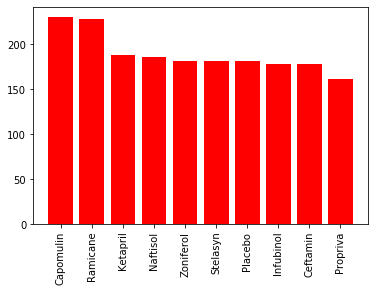

In [17]:
count_drug_regimen = combined_data['Drug Regimen'].value_counts()
reset_count_drug_regimen = count_drug_regimen.reset_index()
x_axis = np.arange(len(count_drug_regimen))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,count_drug_regimen, color = "r", align = "center")
plt.xticks(tick_locations, reset_count_drug_regimen["index"], rotation = "vertical")


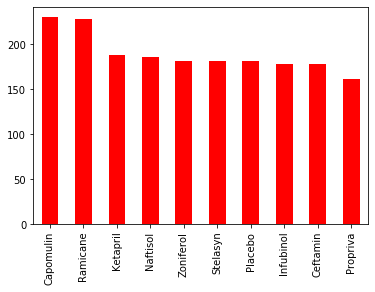

In [27]:
count_drug_regimen.plot(kind="bar",color = "r")

([<matplotlib.patches.Wedge at 0x23e9db26e80>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

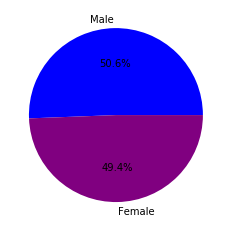

In [36]:
count_mice = combined_data['Sex'].value_counts()
reset_count_mice = count_mice.reset_index()
colors = ["blue", "purple"]
plt.pie(count_mice, labels = reset_count_mice['index'],autopct="%1.1f%%", colors=colors)

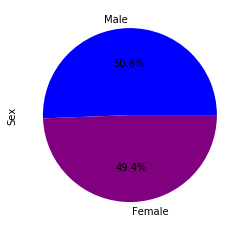

In [37]:
count_mice.plot(kind="pie", colors = colors, autopct="%1.1f%%", labels = reset_count_mice["index"])

In [106]:
regimen_index= combined_data.set_index("Drug Regimen")
promising_regimens = regimen_index.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
reset_promising_regimens = promising_regimens.reset_index()

mouse = combined_data.groupby("Mouse ID").max()
mousetime = mouse['Timepoint']
reset_mousetime = mousetime.reset_index()

promising_reg_mousetime = pd.merge(reset_promising_regimens,reset_mousetime,how = "inner", on = ["Mouse ID","Timepoint"])
promising_reg_mousetime



,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,s185,Female,3,17,45,23.343598,1
1,Capomulin,x401,Female,16,15,45,28.484033,0
2,Capomulin,m601,Male,22,17,45,28.430964,1
3,Capomulin,f966,Male,16,17,20,30.485985,0
4,Capomulin,u364,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
95,Ceftamin,x226,Male,23,28,0,45.000000,0
96,Ceftamin,x581,Female,19,28,45,64.634949,3
97,Ceftamin,x822,Male,3,29,45,61.386660,3
98,Ceftamin,y769,Female,6,27,45,68.594745,4


In [96]:
Tumor_append =[]

promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for drug in promising_drugs:
    promising_drug = promising_reg_mousetime[promising_reg_mousetime["Drug Regimen"] == drug]
    promising_drug = promising_drug[['Drug Regimen' , 'Tumor Volume (mm3)']]
    drug_index = promising_drug.set_index('Drug Regimen')
    Tumor_append.append(drug_index['Tumor Volume (mm3)'])
    quartiles = drug_index.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    

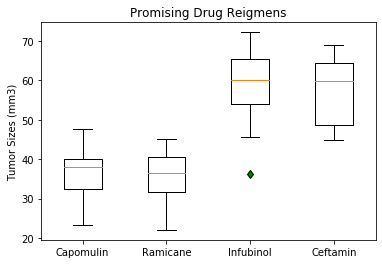

In [104]:
green_diamond = dict(markerfacecolor='g', marker='d')
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Reigmens')
ax1.set_ylabel('Tumor Sizes (mm3)')
ax1.boxplot(Tumor_append, flierprops=green_diamond)
x_axis = np.arange(len(promising_drugs))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, promising_drugs)
plt.show()

In [112]:
regimen_index= combined_data.set_index("Drug Regimen")
Capomulin = regimen_index.loc[['Capomulin']]
reset_Capomulin = Capomulin.reset_index()
Capomulin_mice_index = reset_Capomulin.set_index("Mouse ID")
s185 = Capomulin_mice_index.loc[['s185']]


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
s185,Capomulin,Female,3,17,25,33.949940,0
s185,Capomulin,Female,3,17,30,32.959671,1
s185,Capomulin,Female,3,17,35,28.328531,1
s185,Capomulin,Female,3,17,40,25.472143,1


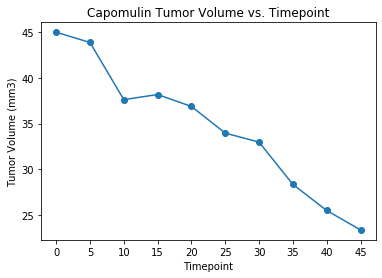

In [117]:
x_axis = np.arange(len(s185["Timepoint"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, s185["Timepoint"])
plt.title('Capomulin Tumor Volume vs. Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.plot(x_axis, s185["Tumor Volume (mm3)"], marker = "o")


In [ ]:
drug_regimen_index = data_set_df.set_index(“Drug Regimen”)
capomulin_mice_weight = drug_regimen_index.loc[[‘Capomulin’]]
cap_mice_weight = capomulin_mice_weight.reset_index()
group_mice_weight = cap_mice_weight.groupby(“Weight (g)“).mean()
reset_group_weight =group_mice_weight.reset_index()
plt.scatter(reset_group_weight[‘Weight (g)’], reset_group_weight[“Tumor Volume (mm3)“],marker=“o”, facecolors=“red”, edgecolors=“black” )



In [ ]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight,tumor)
vc_fit = vc_slope * weight + vc_int
plt.scatter(weight,tumor,marker=“o”, facecolors=“red”, edgecolors=“black” )
plt.plot(weight,vc_fit,“--“)
plt.show()

In [ ]:
correlation_coefficient = round(st.pearsonr(weight,tumor)[0],2)
print(f”The correlation coefficient between Weight (g) and Tumor Volume (mm3) is {correlation_coefficient}“)